## Import the Data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline


In [5]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### About This Dataset
This dataset includes information about movies and TV shows that are available on Netflix. Each row in the dataset represents one title on the platform. The dataset contains details like the title name, whether it’s a movie or a TV show, the release year, rating, duration, and the country where it was produced. I chose this dataset because Netflix is something most people are familiar with, which makes it easier to explore patterns and trends in streaming content.

## Observing the Data

In [6]:
df.shape

(8807, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


### Observations on The Dataset
- The dataset has around 8,000 rows and 2 columns
- The dataset contains both movies and tv shows
- Some of the columns in the dataset have missing values, especially in the "Country" and the "Director" columns
- Most columns contain text-based information such as "title", "country", and "rating".

In [10]:
df.isna().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

- Some columns have missing values
- This is common for real datasets
- For this project, I have kept the data as is since the goal is to explore the dataset 

## Descriptive Summaries 

In [13]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

- Netflix has more movies than TV shows 
- TV shows make up a smaller portion of the catalogue 

In [14]:
df["rating"].value_counts().head(10)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

In [16]:
df["release_year"].value_counts().sort_index().tail(10)

release_year
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64

## Visualizing The Data

### Graph 1: Movies VS TV Shows

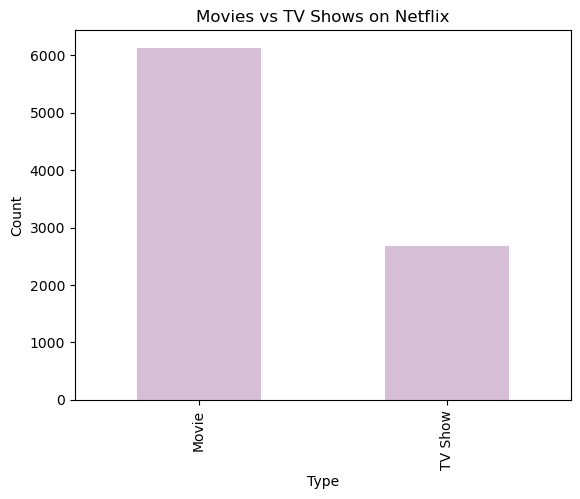

In [20]:
df["type"].value_counts().plot(kind="bar", color="thistle")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

The bar chart above shows:
- Netflix has more movies than TV shows
- TV shows make up a smaller portion 

### Graph 2: Titles Added Over Time

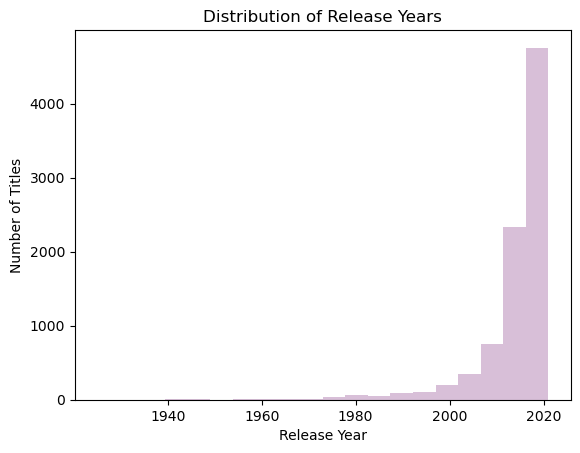

In [21]:
df["release_year"].plot(kind="hist", bins=20, color="thistle")
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

The Histogram above shows that most of Netflix's content is from recent years, with only a few older titles.

### Graph 3: Top Countries

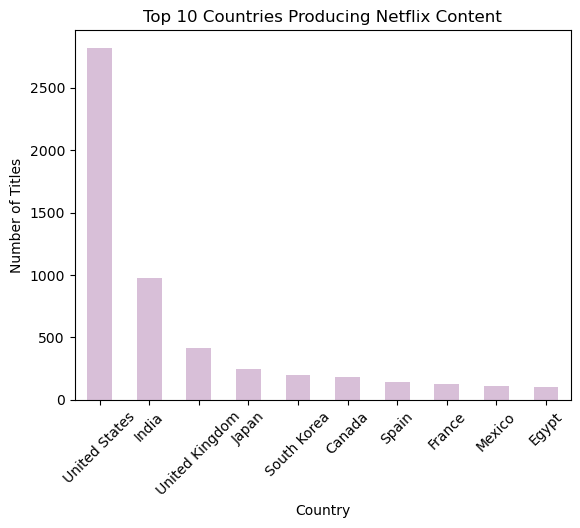

In [22]:
df["country"].value_counts().head(10).plot(kind="bar", color="thistle")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

The bar chart above shows:

- The United States produces the largest number of titles on Netflix

- A small number of countries contribute most of the content on the platform

- This suggests that Netflix content is mainly concentrated in a few major production countries

### Overall Insights From Graphs:
- There are more movies than TV shows available on Netflix

- Most of the content on Netflix comes from the last 10 to 15 years

- A large portion of Netflix titles are produced in the United States

- Netflix content seems to be made mostly in a small number of countries